In [121]:
bins = [1935, 1940, 1947, 1950, 1968, 1971]

In [122]:
from sklearn import tree
import pandas as pd
import numpy as np


In [123]:
data = pd.DataFrame.from_csv('../../data/data.csv')

In [124]:
data = data[['year','shannon_entropy','mean_color_r','luminance','contrast', 'contour']]

In [125]:
data['year_bin']=pd.cut(data['year'], bins)

In [126]:
data.head()

,year,shannon_entropy,mean_color_r,luminance,contrast,contour,year_bin
0,1946,6.768127,195.046332,181.738624,0.827169,0.000056,"(1940, 1947]"
1,1953,6.937948,228.983463,161.723046,0.587802,0.000000,"(1950, 1968]"
2,1944,6.519651,217.905564,214.564295,0.853499,0.003758,"(1940, 1947]"
3,1951,6.451747,191.229599,184.080065,0.706196,0.000063,"(1950, 1968]"
4,1949,5.738259,230.154804,224.799111,0.658131,0.000000,"(1947, 1950]"


In [127]:
clf = tree.DecisionTreeClassifier()

In [128]:
from sklearn.model_selection import train_test_split

features = data[['shannon_entropy','mean_color_r','luminance','contrast', 'contour']]
target = data['year_bin'].astype(str)
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=41)


In [129]:
clf.fit(features_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

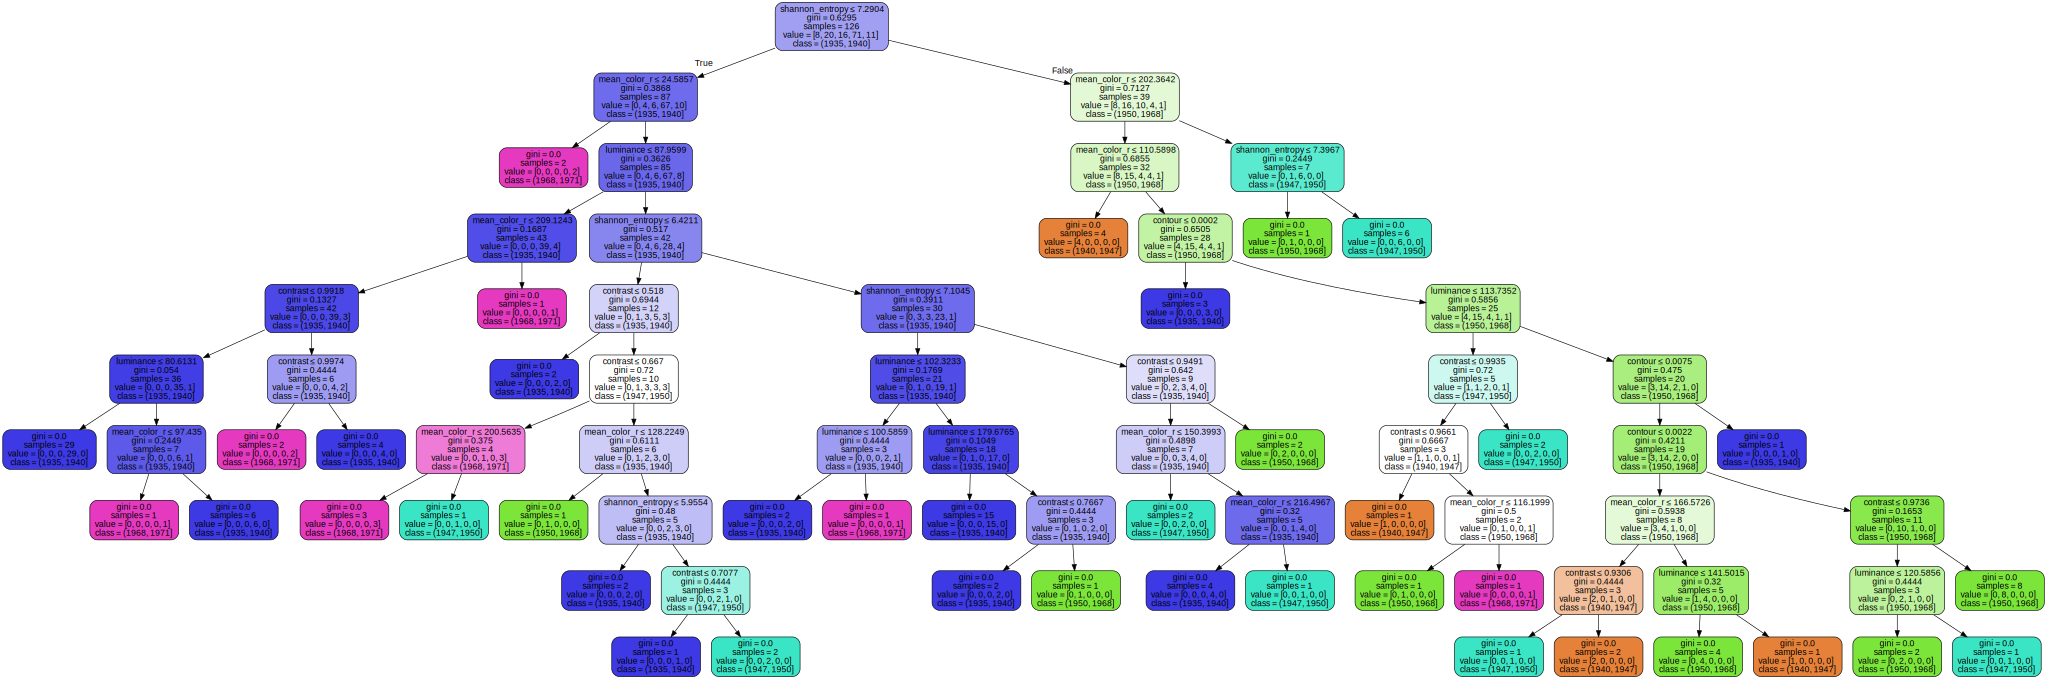

In [131]:
import graphviz 
dot_data = tree.export_graphviz(
   clf, out_file=None,
   feature_names=['shannon_entropy','mean_color_r','luminance','contrast', 'contour'],  
   class_names=list(target.unique()),  
   filled=True, rounded=True,  
   special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

graph = graphviz.Source(dot_data)  
graph

In [200]:
p = clf.predict(features_test)
for i in range(0, len(p)):
    print(p[i] == target_test.tolist()[i], p[i], target_test.tolist()[i])


True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1947, 1950] (1947, 1950]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
False (1947, 1950] (1950, 1968]
True (1950, 1968] (1950, 1968]
False (1935, 1940] (1940, 1947]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1940, 1947] (1940, 1947]
True (1947, 1950] (1947, 1950]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
False (1950, 1968] (1935, 1940]
False (1940, 1947] (1935, 1940]
False (1947, 1950] (1940, 1947]
True (1950, 1968] (1950, 1968]
True (1947, 1950] (1947, 1950]
True (1950, 1968] (1950, 1968]
False (1950, 1968] (1947, 1950]
True (1950, 1968] (1950, 1968]
True (1950, 1968] (1950, 1968]
True (1968, 1971] (1968, 1971]
True (1950, 1968] (1950, 1968]
False (1950, 1968] (1947, 1950]
True (1950, 1968] (1950, 1968]
True (1940, 1947] (1940, 1947]
T

In [196]:
clf.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')>

In [198]:
import sklearn
sklearn.metrics.accuracy_score(target_test,clf.predict(features_test))

0.7857142857142857